In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RupaP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RupaP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
#REading dataset
df=pd.read_csv(r"C:\Users\RupaP\Downloads\dataset.csv")
df.head()

,text,is_rumor,user.handle,topic
0,Charlie Hebdo became well known for publishing...,0.0,BBCDanielS,charliehebdo
1,"Now 10 dead in a shooting there today RT ""@BBC...",0.0,robbylevy,charliehebdo
2,@BBCDanielS @BBCWorld I'm guessing this is bei...,0.0,ModerateInAll,charliehebdo
3,@BBCDanielS @BBCWorld why would you mention th...,0.0,GabTarquini,charliehebdo
4,@BBCDanielS @BBCWorld perps identified?,0.0,freethought41,charliehebdo


In [7]:
df.shape

(62445, 4)

In [8]:
df.dtypes

text            object
is_rumor       float64
user.handle     object
topic           object
dtype: object

In [9]:
df.isnull().sum()

text               0
is_rumor           2
user.handle        2
topic          12777
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.duplicated().sum()

795

In [12]:
#Removing duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
import nltk
nltk.download('punkt')

In [13]:
sw = stopwords.words('english')
lm = WordNetLemmatizer()
text_msg = []
for text in df['text']:
    t = text.lower()
    t = word_tokenize(t)
    t = [i for i in t if i not in sw]
    t = [lm.lemmatize(i) for i in t]
    t = " ".join(t)
    text_msg.append(t)

# Creating the feature matrix
cv = CountVectorizer(max_features=2000)
x = cv.fit_transform(text_msg).toarray()
y = df['is_rumor']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

from sklearn.naive_bayes import MultinomialNB, GaussianNB
m1 = MultinomialNB()
m1.fit(x_train,y_train)

MultinomialNB()

In [14]:
print('Training Score', m1.score(x_train,y_train))
print('Testing Score', m1.score(x_test,y_test))

Training Score 0.9199792649987723
Testing Score 0.9183990833196922


In [15]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0. 0. 0. ... 0. 0. 0.]


In [29]:
from sklearn.metrics import confusion_matrix

# Multinomial Naive Bayes
cm_m1 = confusion_matrix(y_test, ypred_m1)
print("Confusion Matrix - Multinomial Naive Bayes:")
print(cm_m1)

Confusion Matrix - Multinomial Naive Bayes:
[[10138   544]
 [  453  1083]]


In [32]:
pip install matplotlib



     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.8 kB 495.5 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.8 kB 939.4 kB/s eta 0:00:01
     ------------------------------------ 162.8/162.8 kB 977.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.7 MB 12.3 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/7.7 MB 4.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.7 MB 4.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.7 MB 3.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.7 MB 3.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/7.7 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.7 MB 3.2 MB/s eta 0:00:03
   ----- -

In [34]:
pip install seaborn



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 281.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 598.8 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 845.5 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


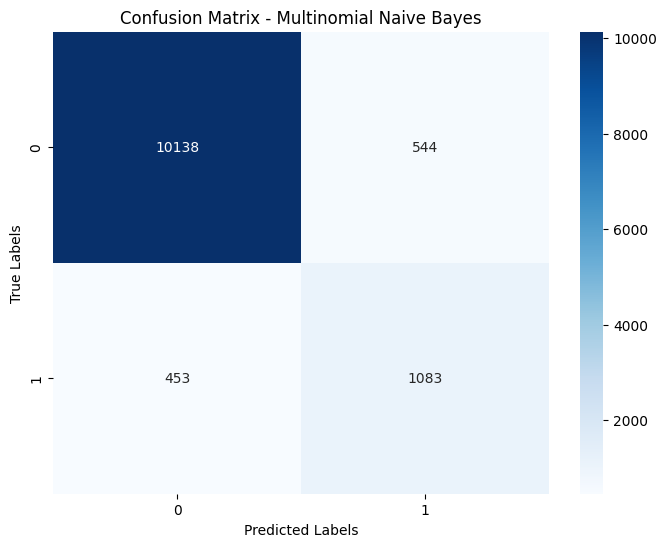

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix for Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_m1, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier object with adjusted hyperparameters
m3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the classifier to the training data
m3.fit(x_train, y_train)

# Make predictions using the trained classifier
y_train_pred = m3.predict(x_train)
y_test_pred = m3.predict(x_test)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate and print the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.873516492510845
Testing Accuracy: 0.8766573907349812


In [36]:
# confusion matrix for Random forest
cm_m3 = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Random Forest:")
print(cm_m3)



Confusion Matrix - Random Forest:
[[10682     0]
 [ 1507    29]]


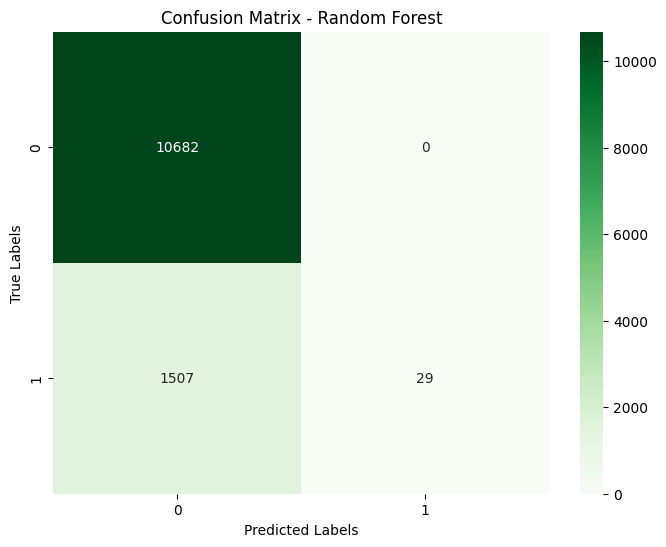

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_m3, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [24]:
#Decission tree
from sklearn import tree
m5 = tree.DecisionTreeClassifier()
m5.fit(x_train, y_train)
print('Training_score', m5.score(x_train, y_train))
print('Testing_score', m5.score(x_test, y_test))

Training_score 0.9955801707909312
Testing_score 0.898674087412015


In [38]:
ypred_m5 = m5.predict(x_test)
cm_m5 = confusion_matrix(y_test, ypred_m5)
print("\nConfusion Matrix - Decision Tree:")
print(cm_m5)


Confusion Matrix - Decision Tree:
[[10013   669]
 [  569   967]]


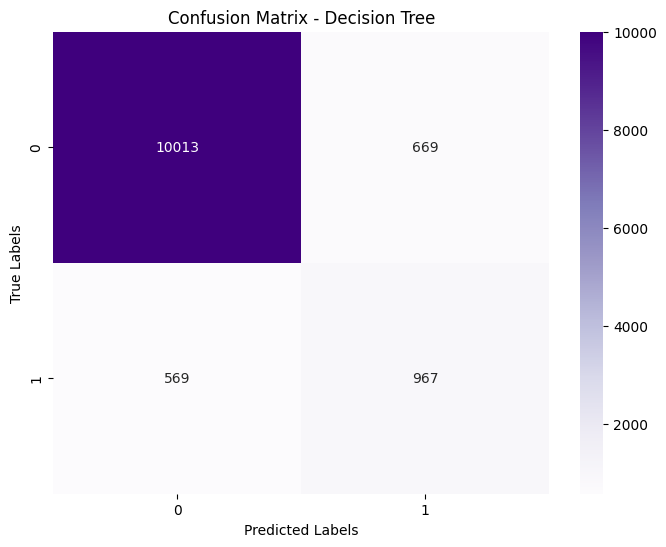

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_m5, annot=True, cmap='Purples', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [41]:
# Example text to classify
example_text = "@S_Jakobsen @BBCDanielS @BBCWorld not quite sure why you are calling me mate..."
# Preprocessing the example text
example_text_processed = example_text.lower()
example_text_processed = word_tokenize(example_text_processed)
example_text_processed = [i for i in example_text_processed if i not in sw]
example_text_processed = [lm.lemmatize(i) for i in example_text_processed]
example_text_processed = " ".join(example_text_processed)

# Transforming the example text into a feature vector
example_text_vector = cv.transform([example_text_processed]).toarray()

# Predicting using the trained classifier
prediction = m5.predict(example_text_vector)

# Printing the prediction
if prediction[0] == 1:
    print("1")
else:
    print("0")

0
